# FE512 - Final Report
### A Share Market Working Database
Instructor: Olorundamilola ’Dami’ Kazeem <br>
Group 12: Yuqi Liu, Chang Liu

## Abstract

__A share market__, where shares are denominated as Renminbi, includes Shanghai and Shenzhen stock exchanges. As the world’s second largest stock market, it has whole bunch of data worth to summarize and explore. By implementing the practical database engineering techniques, the team aims to design and build a __working database__ that equip with functions of information management, data computing and decision support. In this report, we focus on using __mongodb__ to build a __NoSql__ database, answering proposed questions about segments and industries of the market, as well as integrating with python libraries to achieve analysis functions, for example moving average visualization. In conclusion, our working database can help to better understand the stock market, effectively extract useful information, and make futher analysis as need.

## Catalogue
> - Introduction
- Data Source
- Database Design
- Data Summary
- Proposed Questions, Queries & Outputs
- Conclusions
- Future Study
- Reference

## Introduction
To most of stock market investors, industry research has always been important. While for a stock market containing more than three thousand stocks, and each stock releases financial data each quarter, its data amount and value should not be underestimated. A working database can help market researchers easy to implement data mining, so that to perform quantitative analysis that can help decision making. <br>
<br>
As long as the market and financial data are time series data, it is rational for database desinger to choose NoSql database. Mongodb, as a leading NoSQL database, can store data in BSON. It has advantage of simpler query, simple structure, and more flexibility. In this project, the team generated data from CSMAR with 4 csv files, and aims to design database structure, answer proposed questions by queries and visualize extracted data. For further study, the team will investigae on mapreduce, so that to deal with complicated statistics and aggregation operations that takes a long time.

## Introduction - Topic

>-  Design and build a working database for research on China stock market
-  Equip with function of information retrieval and management
-  Integrate with data computing and decision support

## Introduction - Research Questions
>1. How many normal trading stocks and industries on A shares?
2. How many listed companies which are normal trading in each major industries?
3. Which segements realized high net profit in the first quarter of this year?
4. Which industries have maintained a high market value during the past three years?
5. What's the moving average look like for single stock's close price?

## Data Source
The data in this project were downloaded from the China Stock Market & Accounting Research ([CSMAR](http://cn.gtadata.com/)) Database. There are four csv files attached with the report: TRD_Co.csv, fin_mkt.csv, fs_comins and fs_combas, which are A shares 2012 - 2018 stock information data, daily market data and quarterly financial data (income statement and balance sheet).
![CSMAR.png](https://i.postimg.cc/Zn0w1bh1/CSMAR.png) <br>The detail documents of each collection will be introduced in the Database Design and Data Summary sections.

## Database Design - Tree Structure
Because of the property of our time series data, the team decide to use NoSql database. A tree Structure is ploted below.
![data-Model.png](https://i.postimg.cc/FsM0FMf5/Tree-Structure.png)<br>
There are four collections: Stock Info, Market data, Balance sheet and Income statement. Stock info is the main collection and the team will mainly investigate on the industry code under it. All of the collections include stock id field, which is the securities code, similar to ticker. Since each collections have a plenty of fields, the tree structure only shows fields that will be used in the project. For stock info, we mainly focus on industry code, list date and status. For Market data, trade date, close price, daily return and market equity are included. Balance sheet and income statement both have report type and report date. Equity is under balance sheet and net profit is under income statement. The following sections introduce the explanation of each fields.

## Database Design - Collection explanation (Stock Info)
- Stock Code: The securities code published by the Shanghai Stock Exchange and the Shenzhen Stock Exchange. <br>
- Industry Code: the CSRC(China Security Regulatory Commission) industry classification code in 2012 version. <br>
- List Date: Expressed by YYYY-MM-DD, the date of listing of the stock. <br>
- Status: A = normal trading, D = termination of listing, S = suspension of listing, N = suspension of trading.

## Database Design - Collection explanation (Market Data)
- Stock Code: The securities code published by the Shanghai Stock Exchange and the Shenzhen Stock Exchange. <br>
- Trade Date: Expressed as YYYY-MM-DD. <br>
- Close Price: A shares are in RMB, Shanghai B is in US dollars, and Shenzhen B is in Hong Kong dollars. <br>
- Daily Return: Daily stock return rate. <br>
- Market Equity: The product of total number of shares issued and the closing price of each stock, A shares in RMB, Shanghai B shares in US dollars, Shenzhen B shares in Hong Kong dollars, The unit is thousand.

## Database Design - Collection explanation (Balance Sheet)
- Stock Code: The securities code published by the Shanghai Stock Exchange and the Shenzhen Stock Exchange. <br>
- Report Date: YYYY-MM-DD, the first four digits indicate the fiscal year of the financial statements. <br>
- Report Type: A="Consolidated Report", B="Parent Report". <br>
- Equity: Total shareholders' equity.

## Database Design - Collection explanation (Income Statement) 
- Stock Code: The securities code published by the Shanghai Stock Exchange and the Shenzhen Stock Exchange. <br>
- Report Date: YYYY-MM-DD, the first four digits indicate the fiscal year of the financial statements. <br>
- Report Type: A="Consolidated Report", B="Parent Report". <br>
- Net Profit: The net profit realized by the company.

## Data Summary
In this part, the team first imports libraries and makes connection with MongoClient. Pymongo makes working with mongodb avaliable on python. Pandas helps to make BSON looked formal in the report. The four csv files were imported in the jupyter notebook terminal. ($ mongoimport --db fe512db --collection stockInfo --type csv --headerline --file C:\Program Files\MongoDB\Server\4.0\bin\TRD_Co.csv).

In [2]:
import pymongo
import pandas as pd
from pymongo import MongoClient
client = MongoClient()
db = client.final
stockInfo = db.stockInfo
marketData = db.finMkt
balanceSheet = db.bs
incomeStat = db.ins

Show the imported collections in the database:

In [2]:
pd.DataFrame(db.list_collection_names())

,0
0,bs
1,finMkt
2,stockInfo
3,ins


## Data Sets - Stock Info
Use count_documents to get the total number of documents under stock info collection. There are 3741 records.

In [3]:
stockInfo.count_documents({})

3741

## Data Sets - Stock Info
List the first 5 records of the collection. There are 29 fields in the collection.

In [4]:
pd.DataFrame(list(stockInfo.find())).head(5)

,Commnt,Conme,Conme_en,Crcd,Cuntrycd,Curtrd,Estbdt,Favaldt,Indcd,Indnme,...,Nnindnme,Nshripo,Parval,Parvcur,Sctcd,Statco,Statdt,Stkcd,Stknme,_id
0,,深圳中国农大科技股份有限公司,"Shenzhen Cau Technology Co., Ltd.",,10,CNY,1986/5/5,1991/1/14,5,工业,...,医药制造业,12500,1.0,CNY,2,A,2018/5/31,4,国农科技,5bf58d7fbe3c4aa79d2b726d
1,,深圳世纪星源股份有限公司,Shenzhen Fountain Corporation,,10,CNY,1990/2/1,1990/12/10,2,公用事业,...,生态保护和环境治理业,44339,1.0,CNY,2,A,2018/5/31,5,世纪星源,5bf58d7fbe3c4aa79d2b726e
2,,深圳市振业(集团)股份有限公司,"Shenzhen Zhenye (Group) Co., Ltd.",,10,CNY,1989/4/1,1992/4/27,3,房地产,...,房地产业,690,1.0,CNY,2,A,2018/5/31,6,深振业A,5bf58d7fbe3c4aa79d2b726f
3,,深圳市全新好股份有限公司,"Shenzhen Quanxinhao Co.,Ltd.",,10,CNY,1988/11/21,1992/4/13,3,房地产,...,房地产业,8400,1.0,CNY,2,A,2018/6/29,7,全新好,5bf58d7fbe3c4aa79d2b7270
4,,神州高铁技术股份有限公司,"China High-Speed Railway Technology Co., Ltd.",,10,CNY,1989/10/11,1992/5/7,5,工业,...,铁路、船舶、航空航天和其它运输设备制造业,1000,1.0,CNY,2,N,2018/6/6,8,神州高铁,5bf58d7fbe3c4aa79d2b7271


## Data Sets - Stock Info
Use quetry to show the fields (List date, Industry code, Status, Stock code) we will use in the next section, limit the output records to 10. As we can see, the industry code is made by a letter and 2 numbers, where the first letter represents the major industry and the whole code represents segements under each major industry. 

In [5]:
pd.DataFrame(list(stockInfo.find( 
    {}, {"Stkcd": 1, "Nnindcd": 1, "Listdt": 1, "Statco": 1} 
))).head(10).rename(columns={"Stkcd": "Stock Code", "Nnindcd": "Industry Code", "Statco": "Status", "Listdt": "List Date"})


,List Date,Industry Code,Status,Stock Code,_id
0,1991/1/14,C27,A,4,5bf58d7fbe3c4aa79d2b726d
1,1990/12/10,N77,A,5,5bf58d7fbe3c4aa79d2b726e
2,1992/4/27,K70,A,6,5bf58d7fbe3c4aa79d2b726f
3,1992/4/13,K70,A,7,5bf58d7fbe3c4aa79d2b7270
4,1992/5/7,C37,N,8,5bf58d7fbe3c4aa79d2b7271
5,1991/1/29,K70,A,2,5bf58d7fbe3c4aa79d2b7272
6,1995/10/27,E48,A,10,5bf58d7fbe3c4aa79d2b7273
7,1992/3/30,K70,A,11,5bf58d7fbe3c4aa79d2b7274
8,1992/2/28,C30,A,12,5bf58d7fbe3c4aa79d2b7275
9,1992/5/6,F51,D,13,5bf58d7fbe3c4aa79d2b7276


## Data Sets - Market Data
Count the total number of documents inside the collection. There are 4199075 records.

In [6]:
marketData.count_documents({})

4199075

## Data Sets - Market Data
Use find_one to show the first document from the collection. There are 18 fields in the collection.

In [7]:
marketData.find_one()

{'Adjprcnd': 472.785851,
 'Adjprcwd': 544.653723,
 'Capchgdt': '2011-07-20',
 'Clsprc': 15.78,
 'Dnshrtrd': 22113866,
 'Dnvaltrd': 345938687.24,
 'Dretnd': 0.028013,
 'Dretwd': 0.028013,
 'Dsmvosd': 49002559.84,
 'Dsmvtll': 80846469.56,
 'Hiprc': 15.81,
 'Loprc': 15.25,
 'Markettype': 4,
 'Opnprc': 15.36,
 'Stkcd': 1,
 'Trddt': '2012-01-09',
 'Trdsta': 1,
 '_id': ObjectId('5bf58d99be3c4aa79d2b8111')}

## Data Sets - Market Data
Use mongodb query to show the fields (Close price, Daily return, Market equity, Stock code, Trade date) and limit the output records to 10.

In [8]:
pd.DataFrame(list(marketData.find( 
    {}, {"Stkcd": 1, "Trddt": 1, "Clsprc": 1, "Dretwd": 1, "Dsmvtll": 1} ))).head(10).rename(columns=
    {"Stkcd": "Stock Code", "Trddt": "Trade Date", "Clsprc": "Close Price", "Dretwd": "Daily Return", "Dsmvtll" :"Market Equity"})

,Close Price,Daily Return,Market Equity,Stock Code,Trade Date,_id
0,15.78,0.028013,80846469.56,1,2012-01-09,5bf58d99be3c4aa79d2b8111
1,16.78,0.063371,85969819.98,1,2012-01-20,5bf58d99be3c4aa79d2b8112
2,16.71,-0.004172,85611185.45,1,2012-01-30,5bf58d99be3c4aa79d2b8113
3,16.64,-0.004189,85252550.92,1,2012-01-31,5bf58d99be3c4aa79d2b8114
4,16.45,-0.011418,84279114.34,1,2012-02-01,5bf58d99be3c4aa79d2b8115
5,16.92,0.028571,86687089.04,1,2012-02-02,5bf58d99be3c4aa79d2b8116
6,16.99,0.004137,87045723.57,1,2012-02-03,5bf58d99be3c4aa79d2b8117
7,16.83,-0.009417,86225987.50,1,2012-02-06,5bf58d99be3c4aa79d2b8118
8,16.59,-0.014260,84996383.40,1,2012-02-07,5bf58d99be3c4aa79d2b8119
9,16.90,0.018686,86584622.03,1,2012-02-08,5bf58d99be3c4aa79d2b811a


## Data Sets - Balance Sheet
The total number of documents inside the balance sheet is 177875.

In [9]:
balanceSheet.count_documents({})

177875

## Data Sets - Balance Sheet
Fields (Equity, Report date, Stock code) whose report type is "Consolidated". Limit the output records to 10.

In [10]:
pd.DataFrame(list(balanceSheet.find( 
    {"Typrep": "A"}, {"Stkcd": 1, "Accper": 1, "A003000000": 1} 
))).head(10).rename(columns={"Stkcd": "Stock Code", "Accper": "Report Date", "A003000000": "Equity"})

,Equity,Report Date,Stock Code,_id
0,7.982261e+10,2012-06-30,1,5bf58e36be3c4aa79d6ba428
1,8.172588e+10,2012-09-30,1,5bf58e36be3c4aa79d6ba42a
2,8.479878e+10,2012-12-31,1,5bf58e36be3c4aa79d6ba42c
3,7.895742e+10,2012-03-31,1,5bf58e36be3c4aa79d6ba42f
4,8.875900e+10,2013-03-31,1,5bf58e36be3c4aa79d6ba431
5,1.120810e+11,2013-12-31,1,5bf58e36be3c4aa79d6ba432
6,8.479900e+10,2013-01-01,1,5bf58e36be3c4aa79d6ba433
7,1.173000e+11,2014-03-31,1,5bf58e36be3c4aa79d6ba434
8,1.209400e+11,2014-06-30,1,5bf58e36be3c4aa79d6ba435
9,7.538058e+10,2012-01-01,1,5bf58e36be3c4aa79d6ba436


## Data Sets - Income Statement
The total number of documents inside the collection is 177166.

In [11]:
incomeStat.count_documents({})

177166

## Data Sets - Income Statement
List the fields (Report date, Net profit, Stock code) whose report type is "Consolidated". Limit the output records to 10.

In [12]:
pd.DataFrame(list(incomeStat.find( 
    {"Typrep": "A"}, {"Stkcd": 1, "Accper": 1, "B002000000": 1} 
))).tail(10).rename(columns={"Stkcd": "Stock Code", "Accper": "Report Date", "B002000000": "Net Profit"})

,Report Date,Net Profit,Stock Code,_id
89516,2016-06-30,596452.11,900957,5bf5a1a8be3c4aa79d767e2e
89517,2016-09-30,2254166.48,900957,5bf5a1a8be3c4aa79d767e30
89518,2016-01-01,3467898.87,900957,5bf5a1a8be3c4aa79d767e32
89519,2016-12-31,3022152.74,900957,5bf5a1a8be3c4aa79d767e34
89520,2017-03-31,5324024.45,900957,5bf5a1a8be3c4aa79d767e36
89521,2017-06-30,11187154.83,900957,5bf5a1a8be3c4aa79d767e38
89522,2017-09-30,18224007.47,900957,5bf5a1a8be3c4aa79d767e3a
89523,2017-12-31,30015892.98,900957,5bf5a1a8be3c4aa79d767e3c
89524,2017-01-01,3022152.74,900957,5bf5a1a8be3c4aa79d767e3e
89525,2018-03-31,8446714.68,900957,5bf5a1a8be3c4aa79d767e40


## Proposed Questions, Queries & Outputs
In this section, 5 questions were proposed.

### Proposed question 1:
How many normal trading stocks and industries on A shares?

In [13]:
#count the number of stocks which are normal trading(status = A)
stockInfo.count_documents({"Statco": "A"})

3425

>count_documents() is used to count the number of stocks when their status is A (normal trading).<br>
There are __3425 normal trading__ stocks on the market.

In [14]:
#segement industry
len(stockInfo.distinct('Nnindcd'))

81

>distinct() is used to count the unique number of segements.<br>
There are __81 segements__ across the market.

In [15]:
#major industry
ind = stockInfo.distinct('Nnindcd')
majorInd = [w[:-2] for w in ind]
len(set(majorInd))

19

>distinct() is used to count the unique number of major industry. <br>
There are __19 major__ industries across the market.

### Proposed question 2:
How many listed companies which are normal trading(stocks still trading on the market) in each major industries?

In [16]:
list(
stockInfo.aggregate(
    [
        {'$match': {"Statco": "A"}}, 
        {'$unwind': "$Nnindcd" }, 
        {'$group': {'_id': {'$substr': ['$Nnindcd', 0, 1]}, 'count': {'$sum': 1}}},
        {'$project': {'_id': 0, "Major Industry": "$_id", "count": 1 } },
        {'$sort' : { 'count' : -1}},
        {'$limit': 10}
    ]
))

[{'Major Industry': 'C', 'count': 2174},
 {'Major Industry': 'I', 'count': 238},
 {'Major Industry': 'F', 'count': 160},
 {'Major Industry': 'K', 'count': 126},
 {'Major Industry': 'D', 'count': 111},
 {'Major Industry': 'G', 'count': 101},
 {'Major Industry': 'E', 'count': 94},
 {'Major Industry': 'J', 'count': 83},
 {'Major Industry': 'B', 'count': 70},
 {'Major Industry': 'R', 'count': 53}]

>- Use aggregate to group and return the results by the major industries (first letter of industry code).
>- Match the normal trading stock(status=A). 
>- Count the number of each group using "sum: 1".
>- Sort the results by setting as -1 and show top 10 documents.
>- Use 'project' to format the results.

#### Result
Top 4 major industry with the highest number of stocks:
- C: Manufacturing. (2174)
- I: Information transmission, software and information services. (238)
- F: Wholesale and retail trade. (160)
- K: Real estate industry. (126)

### Proposed question 3:
Which segements realized high net profit in the first quarter of this year?

In [17]:
pd.DataFrame(list(
incomeStat.aggregate(
    [
        {'$match': {'$and': [{"Typrep": "A" }, {"Accper": "2018-03-31"}]}},
        {'$lookup': 
                {'from' : 'stockInfo',
                 'localField' : 'Stkcd',
                 'foreignField' : 'Stkcd',
                 'as' : 'Nnindcd'}},
        {'$unwind': "$Nnindcd" }, 
        {'$project': {'_id': 0, "Accper": 1, "B002000000": 1, 'Nnindcd.Nnindcd': 1 } },
        {'$sort' : { 'B002000000' : -1}},
        {'$limit': 10}
    ]
))).rename(columns={"Accper": "Report Date", "B002000000": "Net Profit", "Nnindcd": "Segement"})

,Report Date,Net Profit,Segement
0,2018-03-31,7.906900e+10,{'Nnindcd': 'J66'}
1,2018-03-31,7.407600e+10,{'Nnindcd': 'J66'}
2,2018-03-31,5.904000e+10,{'Nnindcd': 'J66'}
3,2018-03-31,5.218300e+10,{'Nnindcd': 'J66'}
4,2018-03-31,2.895100e+10,{'Nnindcd': 'J68'}
5,2018-03-31,2.452200e+10,{'Nnindcd': 'B07'}
6,2018-03-31,2.270800e+10,{'Nnindcd': 'J66'}
7,2018-03-31,2.023200e+10,{'Nnindcd': 'J66'}
8,2018-03-31,1.772000e+10,{'Nnindcd': 'J66'}
9,2018-03-31,1.520900e+10,{'Nnindcd': 'B07'}


>- Use match to filter the net profit data from consolidate report in the first quarter this year.
>- Use lookup to perform left outer join and add a new the industry code field from stockInfo collection by stock id.
>- Use project to specify the existing fields.
>- Sort the results by net profit and keep the first 10 results.

#### Result
Top 3 segments with the highest net profit in the first quarter this year: 
- J66：Monetary financial services
- J68:  Insurance
- B07: Oil and gas extraction industry

### Proposed question 4:
Which segments have maintained a high market value during the past three years?

In [18]:
pd.DataFrame(list(
marketData.aggregate(
    [
        {"$match": {"$and" : [{'$or': [{"Trddt": "2016-01-04"}, {"Trddt":"2017-01-03"}, {"Trddt":"2018-01-02"}]}, 
                              {'Dsmvtll': {'$gt': 1}}]}},
        {'$lookup': 
                {'from' : 'stockInfo',
                 'localField' : 'Stkcd',
                 'foreignField' : 'Stkcd',
                 'as' : 'Nnindcd'}},
        {'$unwind': "$Nnindcd" }, 
        {'$group': {'_id': '$Nnindcd.Nnindcd', 'avgME': {'$avg': '$Dsmvtll'}}},
        {'$project': {'Trddt': 1, 'avgME': 1}} ,
        {'$sort' : {'avgME': -1}},
        {'$limit': 10}
    ]
))).rename(columns={"_id": "Segment", "avgME": "Three year average market value"})

,Segment,Three year average market value
0,B07,4.360777e+08
1,J66,2.790996e+08
2,J68,2.414920e+08
3,J67,5.993220e+07
4,G60,5.171721e+07
5,G53,4.579605e+07
6,G56,3.484624e+07
7,I63,3.141723e+07
8,C15,3.058094e+07
9,B06,2.856657e+07


>- Use match to filter the market value from last three years.
>- Use lookup to left outer join the industry code from stockInfo collection by stock id.
>- Use group to calculate the average market value by industry code.
>- Use project to specify the existing fields.
>- Use sort and limit to get the top 10 results from the highest to the lowest.

#### Result
Top 6 segments with the highest average market value during the last 3 years:
- B07: Oil and gas extraction industry
- J66：Monetary financial services
- J68: Insurance
- J67: Capital market service
- G60: Postal industry
- G53: Railway transportation industry

### Proposed question 5:
What are the moving average of close price for single stock? (Take stock "601988" as an example.)<br>

(Moving average is an old and simple method to make a general prediction on stock price. The conception of MA is calculate data points by creating a series of averages of different subsets of the full data set.)

>Extract data using mongo query collection.find().

In [3]:
pd1 = pd.DataFrame(list(marketData.find( 
   {}, {"Stkcd": 1, "Trddt": 1, "Clsprc": 1, "Dretwd": 1, "Dsmvtll": 1} ))).rename(columns=
   {"Stkcd": "Stock Code", "Trddt": "Trade Date", "Clsprc": "Close Price", "Dretwd": "Daily Return", "Dsmvtll" :"Market Equity"})
pd1.head(3)

,Close Price,Daily Return,Market Equity,Stock Code,Trade Date,_id
0,15.78,0.028013,80846469.56,1,2012-01-09,5bf58d99be3c4aa79d2b8111
1,16.78,0.063371,85969819.98,1,2012-01-20,5bf58d99be3c4aa79d2b8112
2,16.71,-0.004172,85611185.45,1,2012-01-30,5bf58d99be3c4aa79d2b8113


> For example, we want to predict close price for stock: <font color='Blue'>Bank of China Limited</font>, which code is '601988'. From 2016-01-01 to 2017-01-01:

In [20]:
# Define the plot inputs
code,start,end=input("Please enter the STOCK code, Start date and End date you want to explore one line using commas\n").split(',')
print('Your Stock id: '+ code +'\nStart Date: '+start + '\nEnd date: '+end)

Please enter the STOCK code, Start date and End date you want to explore one line using commas
601988, 2016-01-01, 2017-01-01
Your Stock id: 601988
Start Date:  2016-01-01
End date:  2017-01-01


In [21]:
df2 = pd1[pd1['Stock Code']==int(code)]
df3 = df2[['Close Price','Trade Date']]
df3['Trade Date'] = pd.to_datetime(df3['Trade Date']) 
df3.sort_values(by=['Trade Date'])
df3 = df3.set_index('Trade Date')
df3.head(10)

C:\Users\liuyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Close Price
Trade Date,
2012-01-04,2.91
2012-01-05,2.96
2012-01-09,2.98
2012-01-10,2.99
2012-01-11,2.98
2012-01-13,2.98
2012-01-12,2.98
2012-01-16,2.97
2012-01-17,3.01


In [22]:
aa = pd.DataFrame(list(marketData.find( 
   {}, {"Trddt": 1, "Clsprc": 1} ))).rename(columns=
   {"Trddt": "Trade Date", "Clsprc": "Close Price"})

In [23]:
aa.head(10)

,Close Price,Trade Date,_id
0,15.78,2012-01-09,5bf58d99be3c4aa79d2b8111
1,16.78,2012-01-20,5bf58d99be3c4aa79d2b8112
2,16.71,2012-01-30,5bf58d99be3c4aa79d2b8113
3,16.64,2012-01-31,5bf58d99be3c4aa79d2b8114
4,16.45,2012-02-01,5bf58d99be3c4aa79d2b8115
5,16.92,2012-02-02,5bf58d99be3c4aa79d2b8116
6,16.99,2012-02-03,5bf58d99be3c4aa79d2b8117
7,16.83,2012-02-06,5bf58d99be3c4aa79d2b8118
8,16.59,2012-02-07,5bf58d99be3c4aa79d2b8119
9,16.90,2012-02-08,5bf58d99be3c4aa79d2b811a


> Choose short rolling as 20 days and long rolling as 60 days.

In [24]:
short_rolling = df3.rolling(20).mean()
long_rolling = df3.rolling(window=60).mean()

> Use matplotlib to visualize the moving avearge.

Text(0,0.5,'Close Price(CNY)')

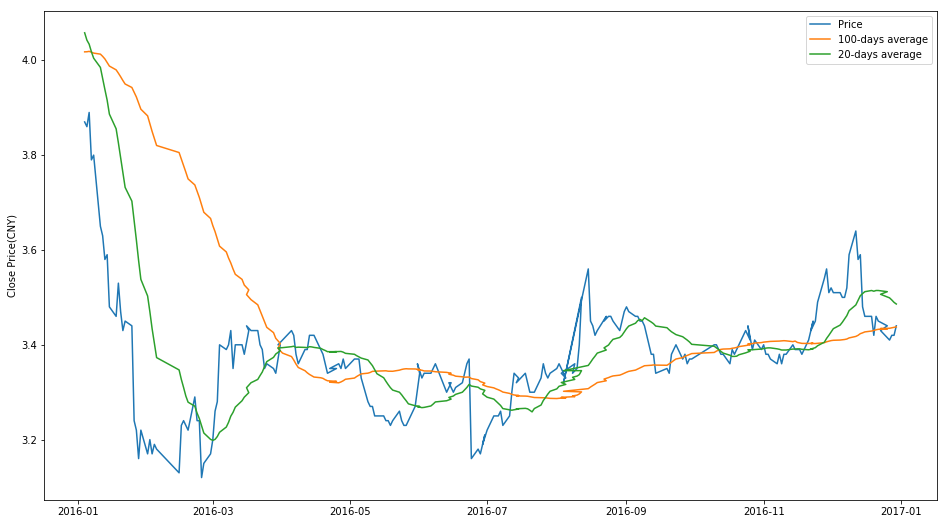

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(df3.loc[start:end, :].index, df3.loc[start:end, 'Close Price'], label='Price')
ax.plot(long_rolling.loc[start:end, :].index, long_rolling.loc[start:end, 'Close Price'], label = '100-days average')
ax.plot(short_rolling.loc[start:end, :].index, short_rolling.loc[start:end, 'Close Price'], label = '20-days average')

ax.legend(loc='best')
ax.set_ylabel('Close Price(CNY)')

#### Result
The blue line is the normal stock closing price. The green line shows the 20-day moving average and the orange line shows 100-day moving average of Bank of China from Jan 1st. 2016 to 2017. The visualization can be changed by modifying the input in stock id, starting date and ending date.

## Conclusions
#### Proposed questions
- There are 3425 normal trading stocks on the market, 81 segments and 19 major industries, where manufactring occupies more than 60% of the total amount of stocks.
- Financial industry relieazed the highest net profit in the first quarter this year.
- Other than financial industry, mining industry, transportation, warehousing and postal services maintain the highest market value during the last three years.
- The extracted data by mongo query can be used to perform calculation and visualization for further analysis.

#### Project conclusion
   MongoDB is a very good database system. it helps people storage and extract data efficiently. The main purpose of this project is to help people who need particular stock data getting their needs efficiently in order to do the future analysis based on those data. To make the work easy and efficient, we combine MongpDB and Python to perform the query and data visualization in order to give people nice format of the data and variables. It also will benefit people doing the analysis and visualization in the future work.

## Future Study
For future work, we will develop more particular query code which most stock insiders need. Combine with python to build more interactive interface. Those interfaces will allow users to enter the specific information and conditions, and query results as well as some basic analysis or visualizations will be provided.

## Reference
- Time Series Data and MongoDB <br>
https://www.mongodb.com/blog/post/time-series-data-and-mongodb-part-2-schema-design-best-practices <br>
- Python MongoDB <br>
https://www.w3schools.com/python/python_mongodb_getstarted.asp
- Aggregation Pipeline Stages <br>
https://docs.mongodb.com/manual/reference/operator/aggregation/lookup/
- China Security Regulatory Commission Industry Code<br>
http://www.daquant.com/help/2-html/html4/2.1.2.html